In [57]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("./input/pima-indians-diabetes-database/diabetes.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Outcome')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

In [58]:
display(X_train, X_test, y_train, y_test)

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30
...,...,...,...,...,...,...,...,...,...
621,621,2,92,76,20,0,24.2,1.698,28
128,128,1,117,88,24,145,34.5,0.403,40
57,57,0,100,88,60,110,46.8,0.962,31
341,341,1,95,74,21,73,25.9,0.673,36


,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
258,258,1,193,50,16,375,25.9,0.655,24
220,220,0,177,60,29,478,34.6,1.072,21
438,438,1,97,70,15,0,18.2,0.147,21
130,130,4,173,70,14,168,29.7,0.361,33
730,730,3,130,78,23,79,28.4,0.323,34
...,...,...,...,...,...,...,...,...,...
678,678,3,121,52,0,0,36.0,0.127,25
500,500,2,117,90,19,71,25.2,0.313,21
256,256,3,111,56,39,0,30.1,0.557,30
80,80,3,113,44,13,0,22.4,0.140,22


,id,Outcome
147,147,0
344,344,0
390,390,0
150,150,0
132,132,1
...,...,...
621,621,0
128,128,1
57,57,0
341,341,0


,id,Outcome
258,258,0
220,220,1
438,438,0
130,130,1
730,730,1
...,...,...
678,678,1
500,500,0
256,256,0
80,80,0


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

model = RandomForestClassifier()
model.fit(X_train, y_train['Outcome'])
prediction = model.predict(X_test)

acc = accuracy_score(y_test['Outcome'], prediction)
print(acc)

0.7792207792207793


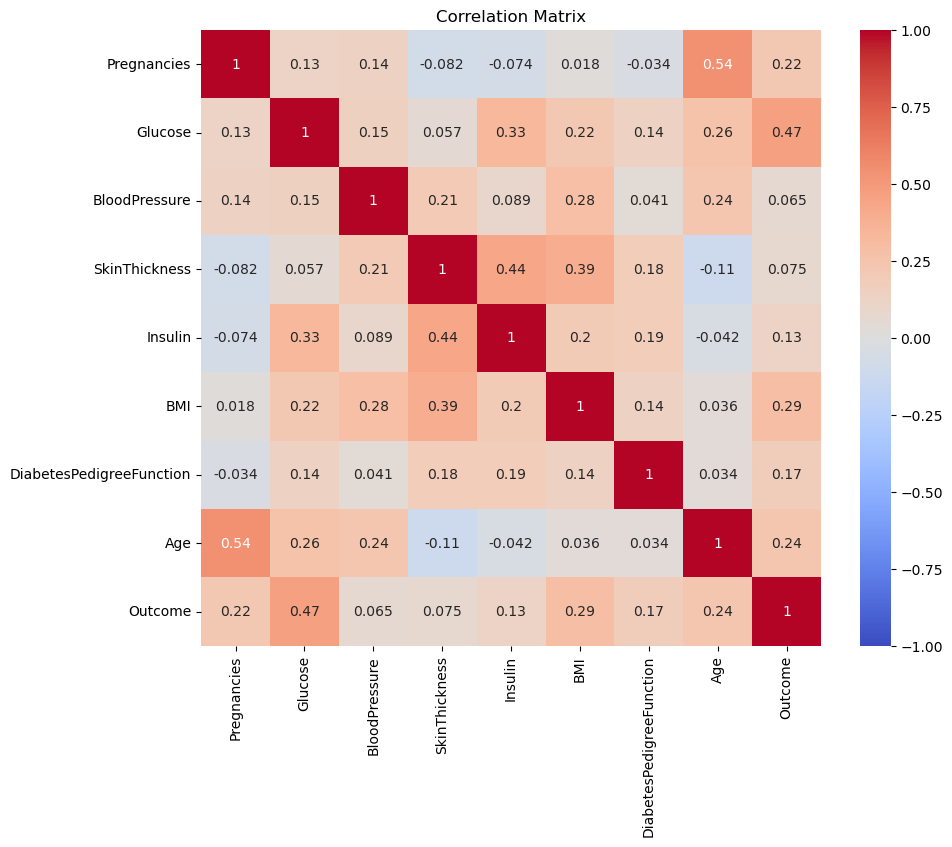

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임의 상관관계 계산
corr_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 147 to 116
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


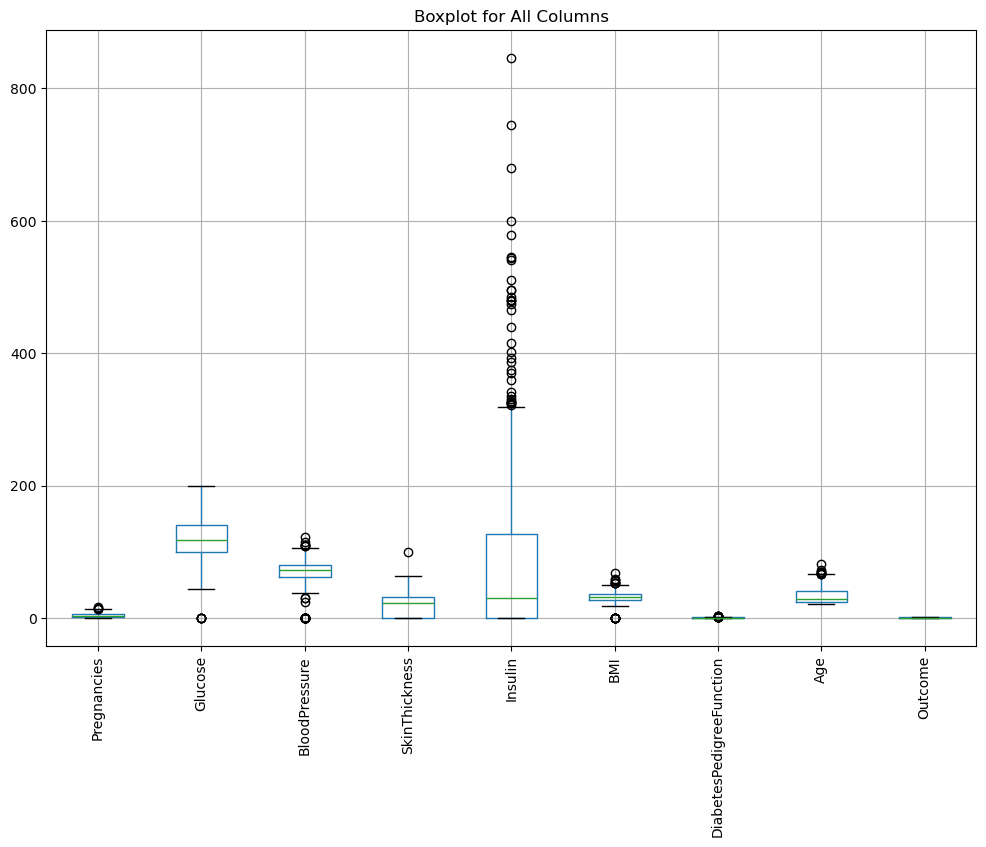

In [62]:
import matplotlib.pyplot as plt

# 데이터프레임의 모든 열에 대해 박스플롯 그리기
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplot for All Columns")
plt.xticks(rotation=90)  # x축 라벨 회전 (필요 시 조정)
plt.show()

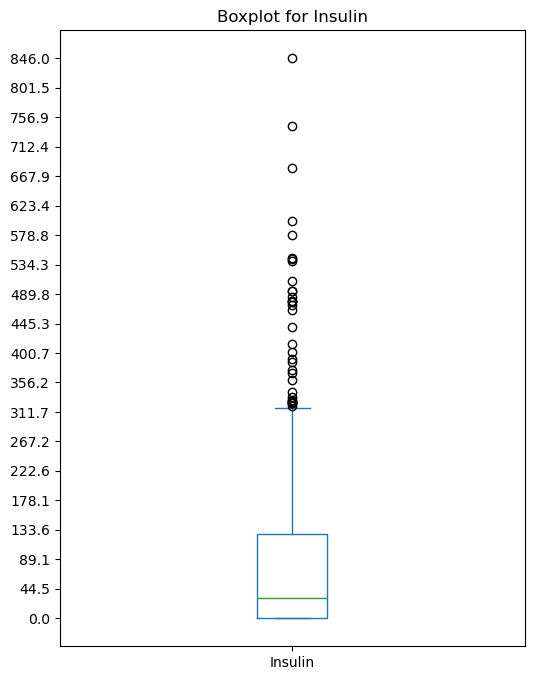

In [63]:
import numpy as np

# 특정 열에 대한 박스플롯 그리기
plt.figure(figsize=(6, 8))
df['Insulin'].plot(kind='box')
plt.title("Boxplot for Insulin")

# y축 눈금 조정 (예: 최솟값 ~ 최댓값 구간을 20개로 나눔)
y_min = df['Insulin'].min()
y_max = df['Insulin'].max()
plt.yticks(np.linspace(y_min, y_max, 20))

plt.show()

Text(0.5, 1.0, 'Boxplot for Insulin (Outliers Removed)')

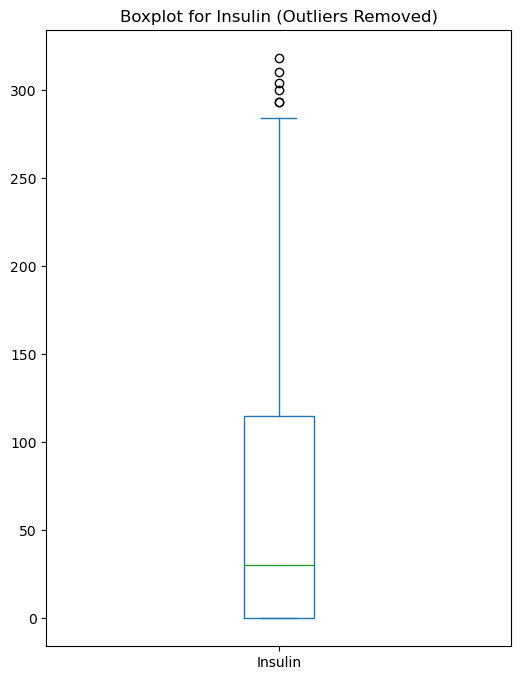

In [64]:
import pandas as pd

Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1

# 상단 수염 계산
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# 평균값 계산
mean_value = df['Insulin'].median()

# 상단 수염을 넘어가는 값들을 평균값으로 대체
X_train['Insulin'] = X_train['Insulin'].apply(
    lambda x: mean_value if x > upper_bound or x < lower_bound else x
)

# 이상치 제거 후 박스플롯 다시 그리기
plt.figure(figsize=(6, 8))
X_train['Insulin'].plot(kind='box')
plt.title("Boxplot for Insulin (Outliers Removed)")

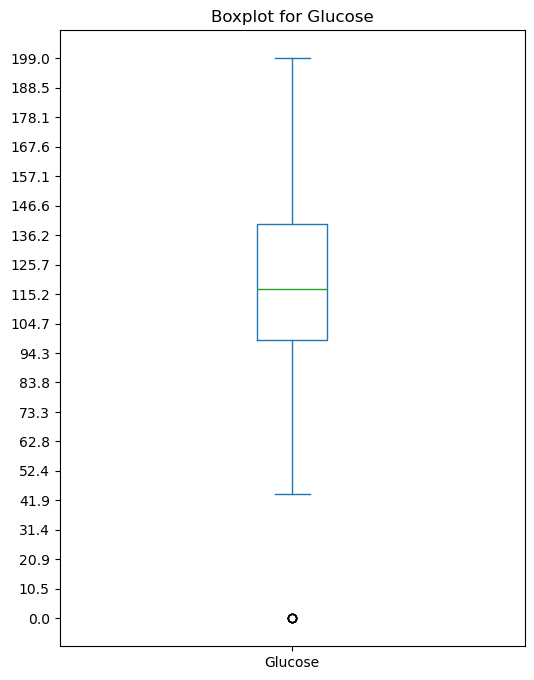

In [65]:
# 특정 열에 대한 박스플롯 그리기
plt.figure(figsize=(6, 8))
df['Glucose'].plot(kind='box')
plt.title("Boxplot for Glucose")

# y축 눈금 조정 (예: 최솟값 ~ 최댓값 구간을 20개로 나눔)
y_min = df['Glucose'].min()
y_max = df['Glucose'].max()
plt.yticks(np.linspace(y_min, y_max, 20))

plt.show()

Text(0.5, 1.0, 'Boxplot for Glucose (Outliers Removed)')

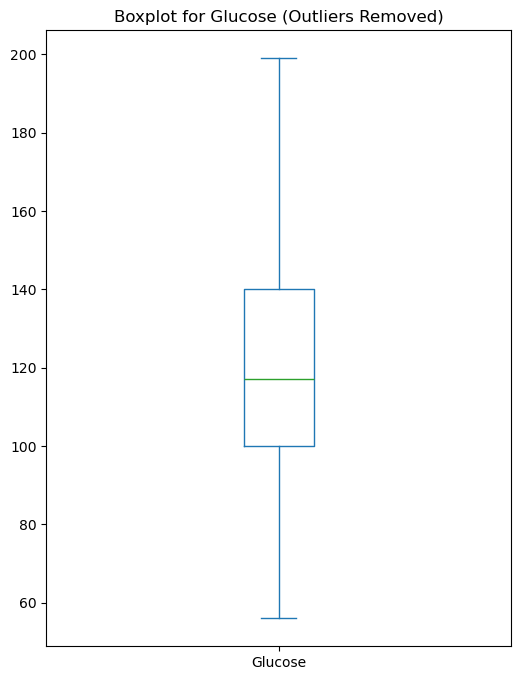

In [66]:
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1

# 상단 수염 계산
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# 평균값 계산
mean_value = df['Glucose'].median()

# 상단 수염을 넘어가는 값들을 평균값으로 대체
X_train['Glucose'] = X_train['Glucose'].apply(
    lambda x: mean_value if x > upper_bound or x < lower_bound else x
)

# 이상치 제거 후 박스플롯 다시 그리기
plt.figure(figsize=(6, 8))
X_train['Glucose'].plot(kind='box')
plt.title("Boxplot for Glucose (Outliers Removed)")

Text(0.5, 1.0, 'Boxplot for BloodPressure (Outliers Removed)')

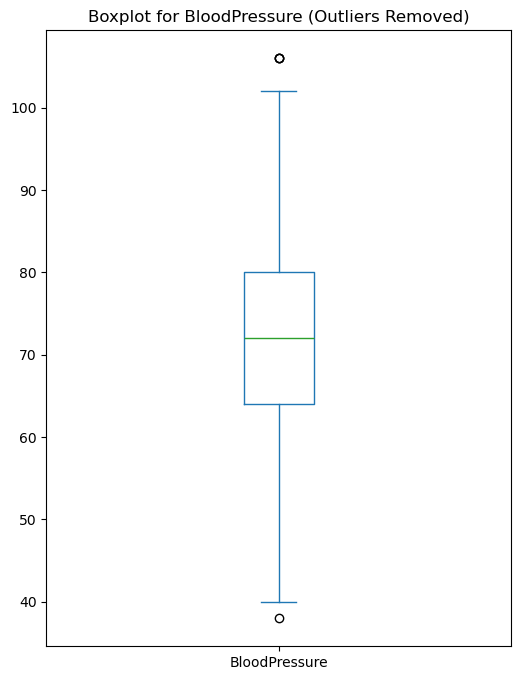

In [67]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

# 상단 수염 계산
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# 평균값 계산
mean_value = df['BloodPressure'].median()

# 상단 수염을 넘어가는 값들을 평균값으로 대체
X_train['BloodPressure'] = X_train['BloodPressure'].apply(
    lambda x: mean_value if x > upper_bound or x < lower_bound else x
)

# 이상치 제거 후 박스플롯 다시 그리기
plt.figure(figsize=(6, 8))
X_train['BloodPressure'].plot(kind='box')
plt.title("Boxplot for BloodPressure (Outliers Removed)")

Text(0.5, 1.0, 'Boxplot for BMI (Outliers Removed)')

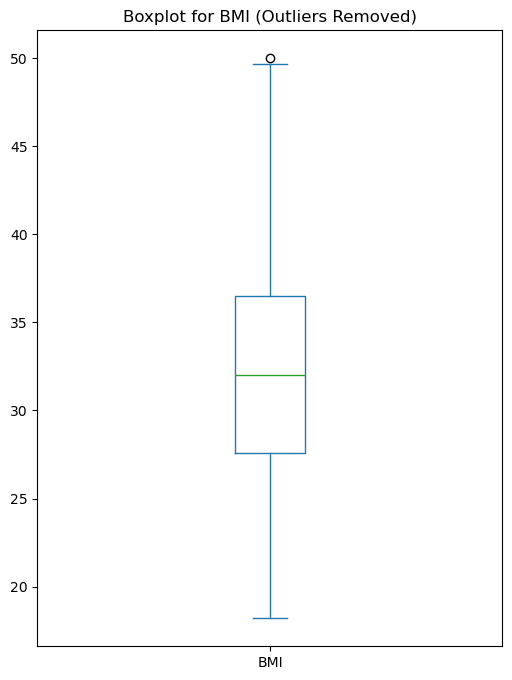

In [68]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# 상단 수염 계산
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# 평균값 계산
mean_value = df['BMI'].median()

# 상단 수염을 넘어가는 값들을 평균값으로 대체
X_train['BMI'] = X_train['BMI'].apply(
    lambda x: mean_value if x > upper_bound or x < lower_bound else x
)

# 이상치 제거 후 박스플롯 다시 그리기
plt.figure(figsize=(6, 8))
X_train['BMI'].plot(kind='box')
plt.title("Boxplot for BMI (Outliers Removed)")

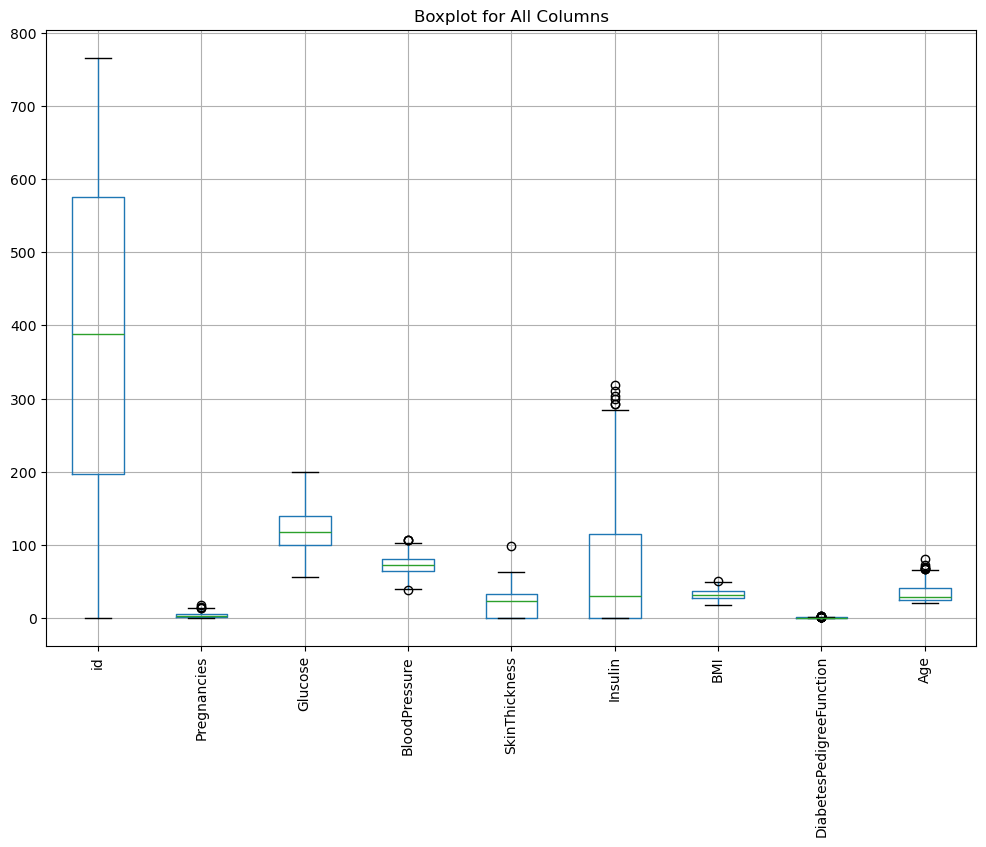

In [69]:
# 데이터프레임의 모든 열에 대해 박스플롯 그리기
plt.figure(figsize=(12, 8))
X_train.boxplot()
plt.title("Boxplot for All Columns")
plt.xticks(rotation=90)  # x축 라벨 회전 (필요 시 조정)
plt.show()

In [70]:
model = RandomForestClassifier()
model.fit(X_train, y_train['Outcome'])
prediction = model.predict(X_test)

acc = accuracy_score(y_test['Outcome'], prediction)
print(acc)

0.7792207792207793
